<a href="https://colab.research.google.com/github/bogicho/flyAI_ML/blob/main/CNN2_1_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#흑백이미지 분류
##Fashion-MNIST를 이용한 다중분류

#1. 데이터 준비

In [1]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


#2. 이미지 확인

#3. 검증 데이터 분리

#4. 이미지 데이터이 정규화

#5. 데이터 Shape확인

#6. 채널 축 추가
- Convolution 레이어의 입력 데이터는 (batch, height, weight, channel)의 형태 필요.
- tf.newaxis 키워드를 사용하거나, reshape() 함수를 사용.


#7. 모델 만들기

#8. 모델의 컴파일

#9. 학습 곡선

#흑백이미지 분류
##Fashion-MNIST를 이용한 다중분류

#1. 데이터 준비

In [3]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


#2. 이미지 확인

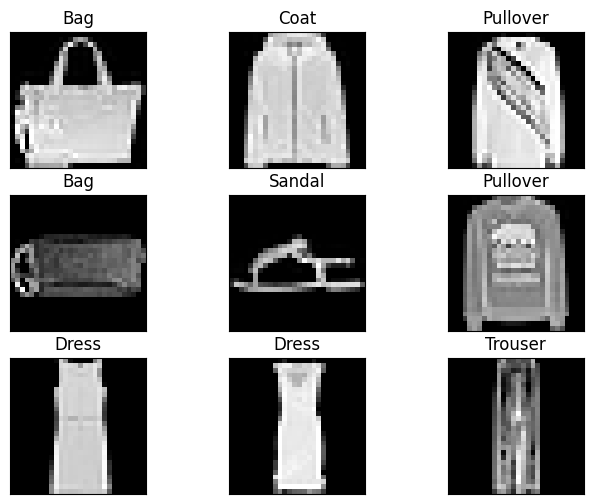

In [5]:
import matplotlib.pyplot as plt


class_names = ['T-shirt/top', 'Trouser', 'Pullover',
               'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
samples = np.random.randint(len(X_train), size=9)
plt.figure(figsize = (8, 6))
for i, idx in enumerate(samples):
   plt.subplot(3, 3, i+1)
   plt.xticks([])
   plt.yticks([])
   plt.imshow(X_train[idx], cmap = 'gray')
   plt.title(class_names[y_train[idx]])
plt.show()

#3. 검증 데이터 분리

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
            X_train, y_train, test_size = 0.3, random_state = 42)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(42000, 28, 28) (42000,)
(18000, 28, 28) (18000,)


#4. 이미지 데이터이 정규화(최소-최대 정규화 처리)

In [7]:
import numpy as np
X_train = X_train.astype('float32') / 255.
X_val = X_val.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
print(np.max(X_train), np.min(X_train))

1.0 0.0


#5. 데이터 Shape확인

In [8]:
print('X_train : ', X_train.shape)
print('X_val : ', X_val.shape)
print('X_test : ', X_test.shape)

X_train :  (42000, 28, 28)
X_val :  (18000, 28, 28)
X_test :  (10000, 28, 28)


#6. 채널 축 추가
- Convolution 레이어의 입력 데이터는 (batch, height, weight, channel)의 형태 필요.
- tf.newaxis 키워드를 사용하거나, reshape() 함수를 사용.


In [9]:
import tensorflow as tf

X_train = X_train[..., tf.newaxis]
X_val = X_val[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

print('X_train : ', X_train.shape)
print('X_val : ', X_val.shape)
print('X_test : ', X_test.shape)

X_train :  (42000, 28, 28, 1)
X_val :  (18000, 28, 28, 1)
X_test :  (10000, 28, 28, 1)


In [17]:
from tensorflow.keras.utils import to_categorical
y_train_oh = to_categorical(y_train)
y_val_oh = to_categorical(y_val)
y_test_oh = to_categorical(y_test)
y_train_oh[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

#7. 모델 만들기

In [18]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
  model = keras.Sequential()
  model.add(layers.Conv2D(filters = 16, kernel_size = 3,
                          strides = (1,1), padding = 'same',
                          activation ='relu',
                          input_shape = (28, 28,1)))
  model.add(layers.MaxPool2D(pool_size = (2,2), strides = 2))

  model.add(layers.Conv2D(filters = 32, kernel_size = 3,
                          strides = (1,1), padding = 'same',
                          activation ='relu',
                          input_shape = (28, 28,1)))
  model.add(layers.MaxPool2D(pool_size = (2,2), strides = 2))

  model.add(layers.Conv2D(filters = 64, kernel_size = 3,
                          strides = (1,1), padding = 'same',
                          activation ='relu',
                          input_shape = (28, 28,1)))
  model.add(layers.MaxPool2D(pool_size = (2,2), strides = 2))

  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  return model

model = build_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 3, 3, 64)        

#8. 모델의 컴파일
- 손실함수는 'categorical_crossentropy'를 사용

In [19]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam,
        loss = 'categorical_crossentropy',
        metrics=['acc'])

#9. 학습

In [20]:
EPOCHS = 30
BATCH_SIZE = 64
history = model.fit(X_train, y_train_oh,
           epochs = EPOCHS,
           batch_size = BATCH_SIZE,
           validation_data = (X_val, y_val_oh),
           verbose = 1)

Epoch 1/30
657/657 [==============================] - 53s 77ms/step - loss: 0.5735 - acc: 0.7912 - val_loss: 0.3875 - val_acc: 0.8611
Epoch 2/30
657/657 [==============================] - 46s 70ms/step - loss: 0.3600 - acc: 0.8718 - val_loss: 0.3241 - val_acc: 0.8809
Epoch 3/30
657/657 [==============================] - 45s 68ms/step - loss: 0.3122 - acc: 0.8861 - val_loss: 0.2990 - val_acc: 0.8915
Epoch 4/30
657/657 [==============================] - 45s 69ms/step - loss: 0.2852 - acc: 0.8975 - val_loss: 0.3003 - val_acc: 0.8876
Epoch 5/30
657/657 [==============================] - 46s 70ms/step - loss: 0.2603 - acc: 0.9048 - val_loss: 0.2818 - val_acc: 0.8959
Epoch 6/30
657/657 [==============================] - 45s 69ms/step - loss: 0.2393 - acc: 0.9118 - val_loss: 0.2586 - val_acc: 0.9045
Epoch 7/30
657/657 [==============================] - 51s 77ms/step - loss: 0.2214 - acc: 0.9191 - val_loss: 0.2605 - val_acc: 0.9050
Epoch 8/30
657/657 [==============================] - 50s 77ms

#10. 학습 곡선

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['acc'], label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_acc'], label = 'Val Accuracy')
  plt.legend()
plt.show()

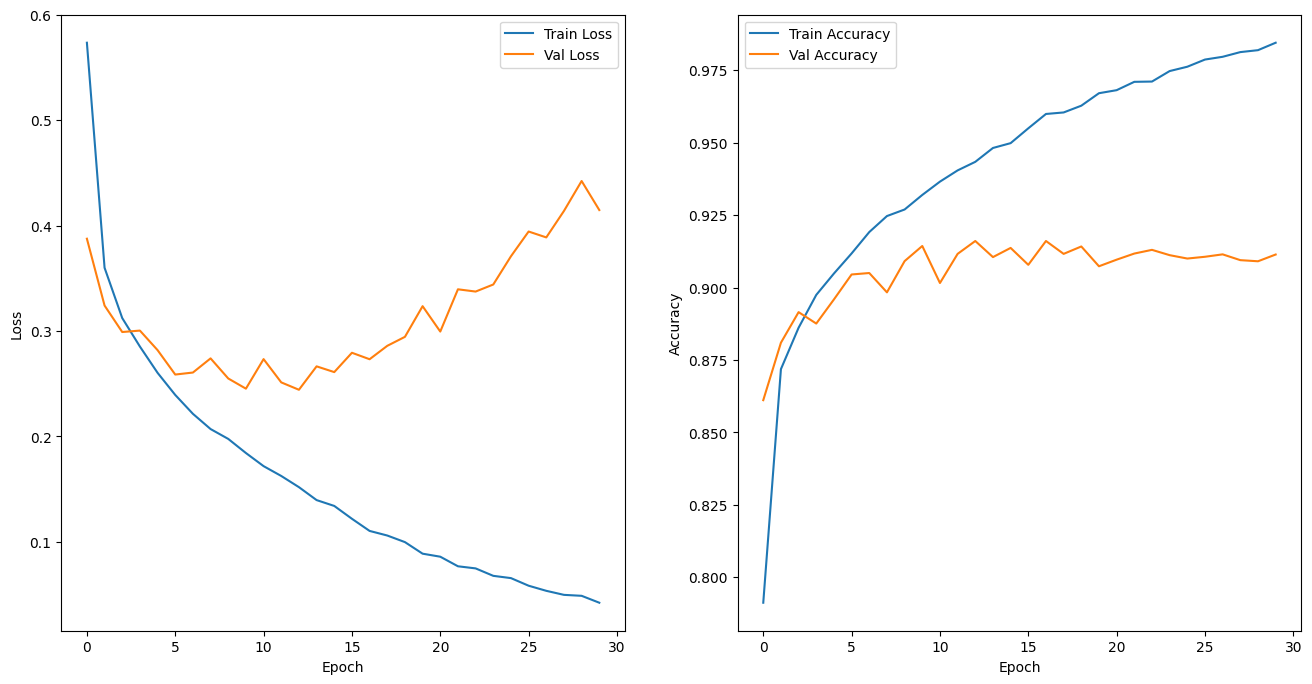

In [22]:
plot_history(history)

# 2-2 드롭아웃

## 오버피팅(Overfitting)을 수정하기 위해서 Dropout 레이어를 추가한 모델을 학습

#1. 모델 만들기
- Dropout 레이어 추가 모델 구성

In [24]:
from tensorflow import keras
from tensorflow.keras import layers
def build_dropout_model():
   model = keras.Sequential()
   model.add(layers.Conv2D(filters=16,
                           kernel_size= 3,
                           strides=(1, 1),
                           padding='same',
                           activation='relu',
                           input_shape=(28, 28, 1)))
   model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
   model.add(layers.Dropout(0.2))

   model.add(layers.Conv2D(filters=32,
                           kernel_size= 3,
                           strides=(1, 1),
                           padding='same',
                           activation='relu'))
   model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
   model.add(layers.Dropout(0.2))

   model.add(layers.Conv2D(filters=64,
                           kernel_size= 3,
                           strides=(1, 1),
                           padding='same',
                           activation='relu'))
   model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
   model.add(layers.Dropout(0.2))

   model.add(layers.Flatten())
   model.add(layers.Dense(64, activation = 'relu'))
   model.add(layers.Dense(10, activation = 'softmax'))
   return model

In [25]:
model = build_dropout_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 14, 14, 16)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)         

#2. 컴파일 및 학습

In [26]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['acc'])

In [28]:
EPOCHS = 30
BATCH_SIZE = 64
history = model.fit(X_train, y_train_oh,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    validation_data = (X_val, y_val_oh),
                    verbose = 1)

Epoch 1/30
657/657 [==============================] - 49s 75ms/step - loss: 0.1924 - acc: 0.9264 - val_loss: 0.2126 - val_acc: 0.9224
Epoch 2/30
657/657 [==============================] - 52s 80ms/step - loss: 0.1909 - acc: 0.9273 - val_loss: 0.2146 - val_acc: 0.9225
Epoch 3/30
657/657 [==============================] - 59s 90ms/step - loss: 0.1937 - acc: 0.9266 - val_loss: 0.2107 - val_acc: 0.9234
Epoch 4/30
657/657 [==============================] - 54s 83ms/step - loss: 0.1908 - acc: 0.9278 - val_loss: 0.2085 - val_acc: 0.9248
Epoch 5/30
657/657 [==============================] - 55s 84ms/step - loss: 0.1902 - acc: 0.9280 - val_loss: 0.2125 - val_acc: 0.9218
Epoch 6/30
657/657 [==============================] - 72s 110ms/step - loss: 0.1876 - acc: 0.9286 - val_loss: 0.2080 - val_acc: 0.9239
Epoch 7/30
657/657 [==============================] - 63s 96ms/step - loss: 0.1846 - acc: 0.9300 - val_loss: 0.2104 - val_acc: 0.9238
Epoch 8/30
657/657 [==============================] - 57s 87m

#3. 학습 곡선

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['acc'], label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_acc'], label = 'Val Accuracy')
  plt.legend()
plt.show()

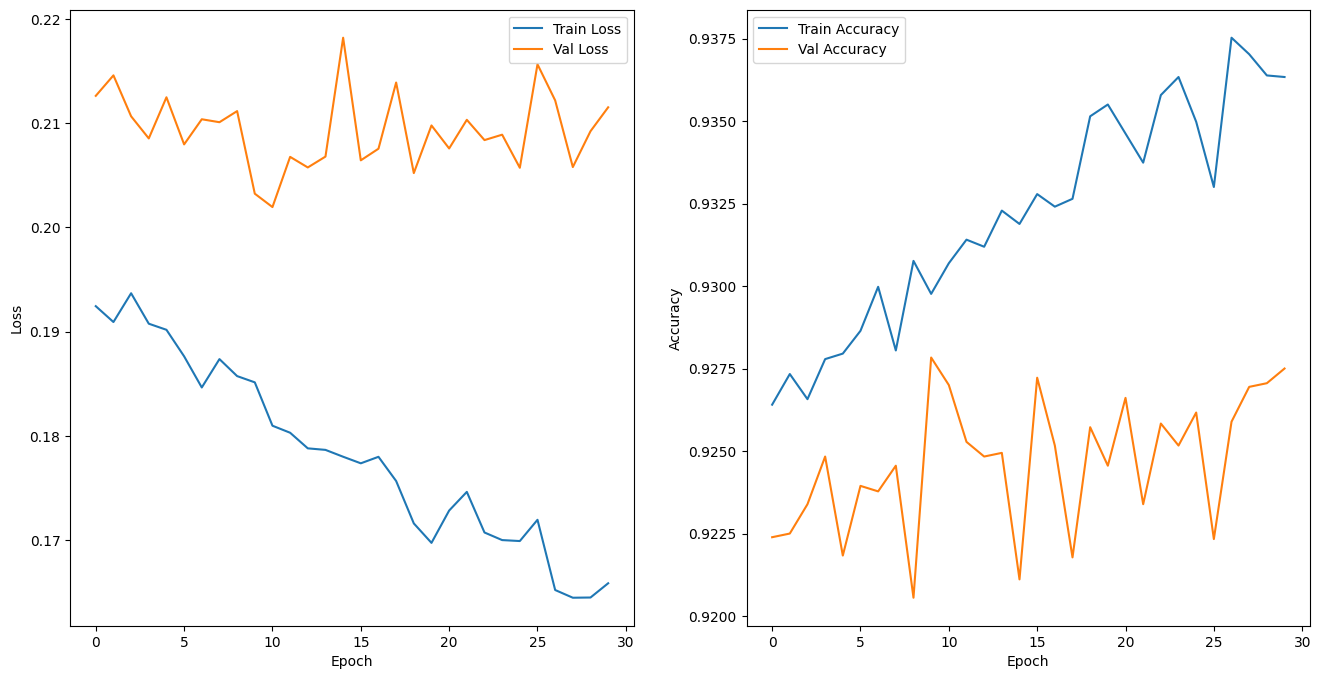

In [30]:
plot_history(history)

#4. 예측

In [31]:
y_pred = model.predict(X_test)
y_pred_argmax = np.argmax(y_pred, axis=1)
y_pred_argmax[:10]

313/313 [==============================] - 3s 10ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

#5. 평가 지표 계산

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def print_score(y_test, y_pred):
   print('accuracy: %.3f' % (accuracy_score(y_test, y_pred)))
   print('precision: %.3f' % (precision_score(y_test, y_pred, average='macro')))
   print('recall_score: %.3f' % (recall_score(y_test, y_pred, average='macro')))
   print('f1_score: %.3f' % (f1_score(y_test, y_pred, average='macro')))

In [34]:
print_score(y_test, y_pred_argmax)

accuracy: 0.918
precision: 0.918
recall_score: 0.918
f1_score: 0.918


#2-3 드롭아웃

## 다중분류는 레이블을 원핫인코딩하지만 이번에는 레이블 데이터를 원-핫 인코딩하지 않고 사용하는 방법!!!

#1. 모델 만들기

In [35]:
model = build_dropout_model()

#2. 모델 컴파일
- 레이블 데이터를 원-핫 인코딩하지 않았다면, 손실 함수로 ‘sparse_categorical_crossentropy’ 를 사용

In [36]:
model.compile(optimizer='adam',
        loss = 'sparse_categorical_crossentropy',
        metrics=['acc'])

#3. 모델의 학습
- 모델에 입력하는 레이블 데이터는 원-핫 인코딩을 하지않은 상태의 데이터를 입력

In [37]:
EPOCHS = 30
BATCH_SIZE = 64
history = model.fit(X_train, y_train,
           epochs = EPOCHS,
           batch_size = BATCH_SIZE,
           validation_data = (X_val, y_val),
           verbose = 1)

Epoch 1/30
657/657 [==============================] - 53s 79ms/step - loss: 0.7188 - acc: 0.7330 - val_loss: 0.4745 - val_acc: 0.8239
Epoch 2/30
657/657 [==============================] - 52s 79ms/step - loss: 0.4604 - acc: 0.8310 - val_loss: 0.3708 - val_acc: 0.8651
Epoch 3/30
657/657 [==============================] - 53s 80ms/step - loss: 0.3994 - acc: 0.8530 - val_loss: 0.3381 - val_acc: 0.8783
Epoch 4/30
657/657 [==============================] - 50s 77ms/step - loss: 0.3609 - acc: 0.8676 - val_loss: 0.3057 - val_acc: 0.8869
Epoch 5/30
657/657 [==============================] - 55s 83ms/step - loss: 0.3383 - acc: 0.8740 - val_loss: 0.2980 - val_acc: 0.8905
Epoch 6/30
657/657 [==============================] - 50s 76ms/step - loss: 0.3186 - acc: 0.8813 - val_loss: 0.2783 - val_acc: 0.8956
Epoch 7/30
657/657 [==============================] - 50s 76ms/step - loss: 0.3062 - acc: 0.8861 - val_loss: 0.2787 - val_acc: 0.8971
Epoch 8/30
657/657 [==============================] - 49s 75ms

#4. 예측
- 예측 결과는 10개 클래스에 대한 확률값으로 출력

In [38]:
y_pred = model.predict(X_test)
y_pred[:1]

313/313 [==============================] - 3s 10ms/step


array([[2.3525784e-08, 2.9758004e-07, 3.9486725e-09, 6.7678734e-08,
        4.6488918e-10, 6.9807511e-06, 1.6912761e-08, 1.2073994e-03,
        3.5049552e-09, 9.9878526e-01]], dtype=float32)

#4. 평가 지표 계산

In [39]:
y_pred_argmax = np.argmax(y_pred, axis=1)
print_score(y_test, y_pred_argmax)

accuracy: 0.915
precision: 0.915
recall_score: 0.916
f1_score: 0.915


----------------

# *** 실 습 ***

## (1) MNIST 데이터를 CNN으로 모델 변경
# 정확도 ?